# 1. SETUP LIBRARY

In [ ]:
# Import libraries yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Library untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Library untuk modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            mean_squared_error, r2_score, mean_absolute_error)

# Library untuk Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Upload file di Google Colab
from google.colab import files
import io

print("=" * 50)
print("UPLOAD FILE DATASET (BEED_Data.csv)")
print("=" * 50)

# Upload dataset
uploaded = files.upload()

# Load dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"\n✓ Dataset '{file_name}' berhasil diupload dan dimuat!")
print(f"✓ Shape dataset: {df.shape}")

UPLOAD FILE DATASET (BEED_Data.csv)


Saving BEED_Data.csv to BEED_Data.csv

✓ Dataset 'BEED_Data.csv' berhasil diupload dan dimuat!
✓ Shape dataset: (8000, 17)


# 2. DATA UNDERSTANDING

In [ ]:
#@title 2.1 Load & Preview Dataset

print("\n 2.1 PREVIEW DATA")
print("-" * 50)
print("\n 5 Baris Pertama Dataset:")
print(df.head())

print("\n Informasi Dataset:")
print(df.info())

print("\n Statistik Deskriptif:")
print(df.describe())


 2.1 PREVIEW DATA
--------------------------------------------------

 5 Baris Pertama Dataset:
     X1     X2     X3     X4    X5    X6    X7    X8    X9   X10   X11    X12  \
0     4    7.0   18.0   25.0  28.0  27.0  20.0  10.0 -10.0 -18.0 -20.0  -16.0   
1    87  114.0  120.0  106.0  76.0  54.0  28.0   5.0 -19.0 -49.0 -85.0 -102.0   
2 -1358    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
3    68  104.0   73.0   34.0 -12.0 -26.0 -38.0 -36.0 -67.0 -88.0 -25.0   31.0   
4   -67  -90.0  -97.0  -94.0 -86.0 -71.0 -43.0 -11.0  23.0  46.0  58.0   50.0   

     X13   X14   X15   X16    y  
0   13.0  32.0  12.0  10.0  0.0  
1 -100.0 -89.0 -61.0 -21.0  0.0  
2    NaN   NaN   NaN   NaN  NaN  
3   18.0  -4.0   6.0 -29.0  0.0  
4   39.0  19.0  -9.0 -41.0  0.0  

 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1   

In [ ]:
#@title 2.2 Analisis Struktur Data

print("\n2.2 ANALISIS STRUKTUR DATA")
print("-" * 50)
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
print(f"\nNama Kolom:\n{list(df.columns)}")

# Identifikasi tipe fitur
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nFitur Numerik ({len(numerical_cols)}): {numerical_cols}")
print(f"Fitur Kategorikal ({len(categorical_cols)}): {categorical_cols}")

# Identifikasi target (asumsi kolom terakhir atau yang bernama 'target'/'label')
# Sesuaikan dengan dataset Anda
if 'target' in df.columns:
    target_col = 'target'
elif 'label' in df.columns:
    target_col = 'label'
else:
    target_col = df.columns[-1]  # Kolom terakhir sebagai target

print(f"\n Target Variable: '{target_col}'")


2.2 ANALISIS STRUKTUR DATA
--------------------------------------------------
Jumlah Baris: 8000
Jumlah Kolom: 17

Nama Kolom:
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'y']

Fitur Numerik (17): ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'y']
Fitur Kategorikal (0): []

 Target Variable: 'y'


In [ ]:
#@title 2.3 Kondisi Data

print("\n2.3 KONDISI DATA")
print("-" * 50)

# Missing values
print("\n Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("✓ Tidak ada missing values")

# Duplicate data
duplicates = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicates}")

# Distribusi target
print(f"\n Distribusi Target ('{target_col}'):")
print(df[target_col].value_counts())
print(f"\nPersentase:")
print(df[target_col].value_counts(normalize=True) * 100)


2.3 KONDISI DATA
--------------------------------------------------

 Missing Values:
X2     238
X3     271
X4     271
X5     271
X6     271
X7     271
X8     271
X9     271
X10    271
X11    271
X12    271
X13    271
X14    271
X15    271
X16    271
y      271
dtype: int64

 Duplicate Rows: 24

 Distribusi Target ('y'):
y
1.0    1999
3.0    1985
2.0    1983
0.0    1762
Name: count, dtype: int64

Persentase:
y
1.0    25.863630
3.0    25.682495
2.0    25.656618
0.0    22.797257
Name: proportion, dtype: float64


# 3. EXPLORATORY DATA ANALYSIS (EDA)

Visualisasi 1: Distribusi Variabel Target
Menampilkan sebaran data pada variabel target untuk memahami karakteristik target


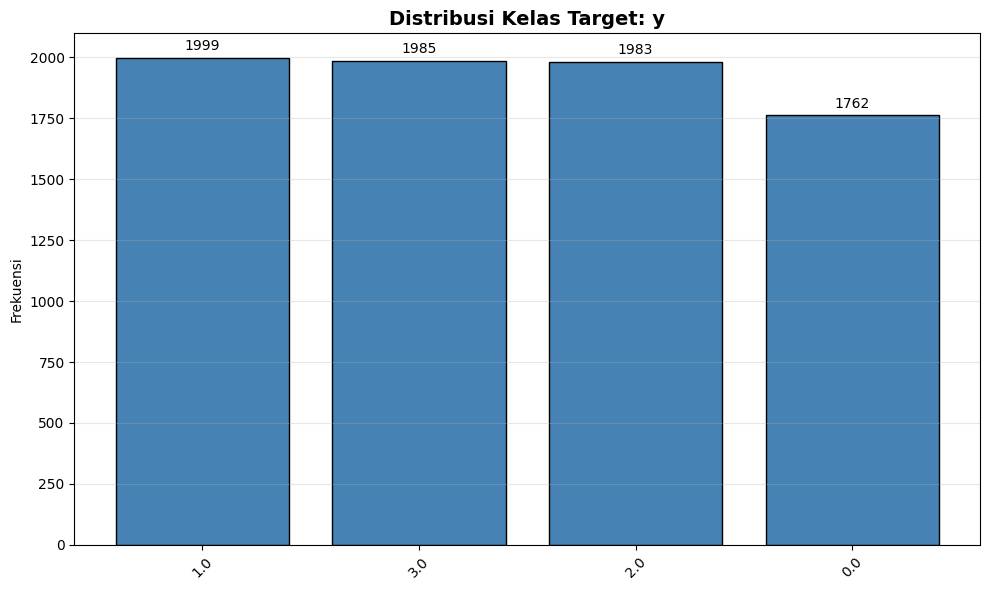

In [ ]:
#@title Visualisasi 1: Distribusi Target
print("Visualisasi 1: Distribusi Variabel Target")
print("Menampilkan sebaran data pada variabel target untuk memahami karakteristik target")

plt.figure(figsize=(10, 6))

# Define TASK_TYPE and target_column
TASK_TYPE = 'classification'  # Based on the discrete values in the 'y' column, it's a classification task
target_column = target_col    # Use the target_col defined previously

if TASK_TYPE == 'classification':
    # Bar plot untuk klasifikasi
    target_counts = df[target_column].value_counts()
    plt.bar(range(len(target_counts)), target_counts.values, color='steelblue', edgecolor='black')
    plt.xticks(range(len(target_counts)), target_counts.index, rotation=45)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi Kelas Target: {target_column}', fontsize=14, fontweight='bold')

    # Tambahkan label nilai di atas bar
    for i, v in enumerate(target_counts.values):
        plt.text(i, v + max(target_counts.values)*0.01, str(v), ha='center', va='bottom')
else:
    # Histogram untuk regresi
    plt.hist(df[target_column].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    plt.xlabel(target_column)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi Target: {target_column}', fontsize=14, fontweight='bold')
    plt.axvline(df[target_column].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[target_column].mean():.2f}')
    plt.legend()

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


 Visualisasi 2: Distribusi Fitur Numerik


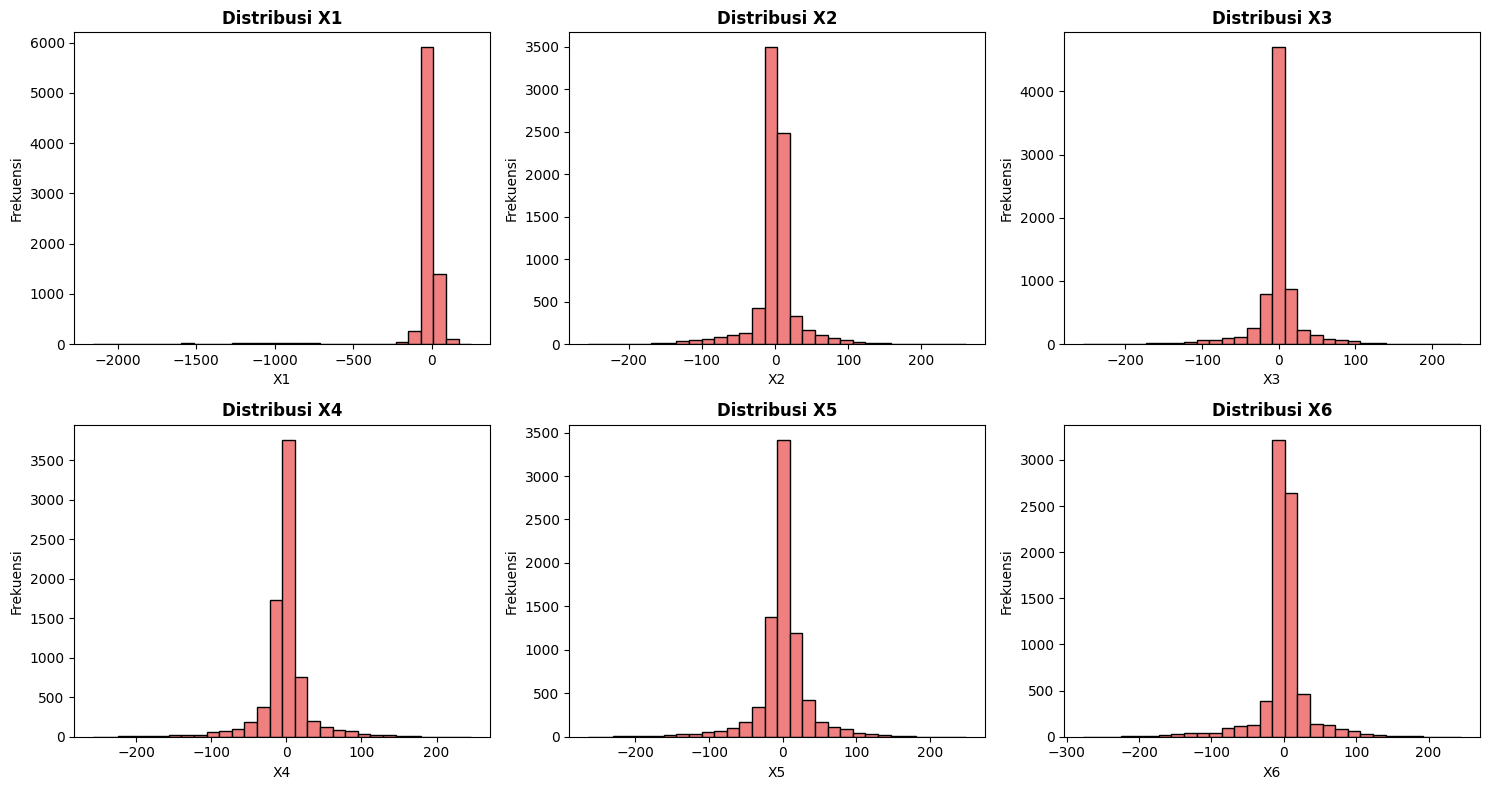

In [ ]:
#@title Visualisasi 2: Distribusi Fitur Numerik
print("\n Visualisasi 2: Distribusi Fitur Numerik")
if len(numerical_cols) > 0:
    # Pilih maksimal 6 fitur numerik pertama untuk visualisasi
    cols_to_plot = numerical_cols[:6]
    n_cols = len(cols_to_plot)
    n_rows = (n_cols + 2) // 3

    fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
    axes = axes.flatten() if n_cols > 1 else [axes]

    for idx, col in enumerate(cols_to_plot):
        if col != target_col:  # Hindari plot target 2x
            axes[idx].hist(df[col].dropna(), bins=30, color='lightcoral', edgecolor='black')
            axes[idx].set_title(f'Distribusi {col}', fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frekuensi')

    # Hapus subplot kosong
    for idx in range(len(cols_to_plot), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()


 Visualisasi 3: Correlation Heatmap (Fitur Numerik)


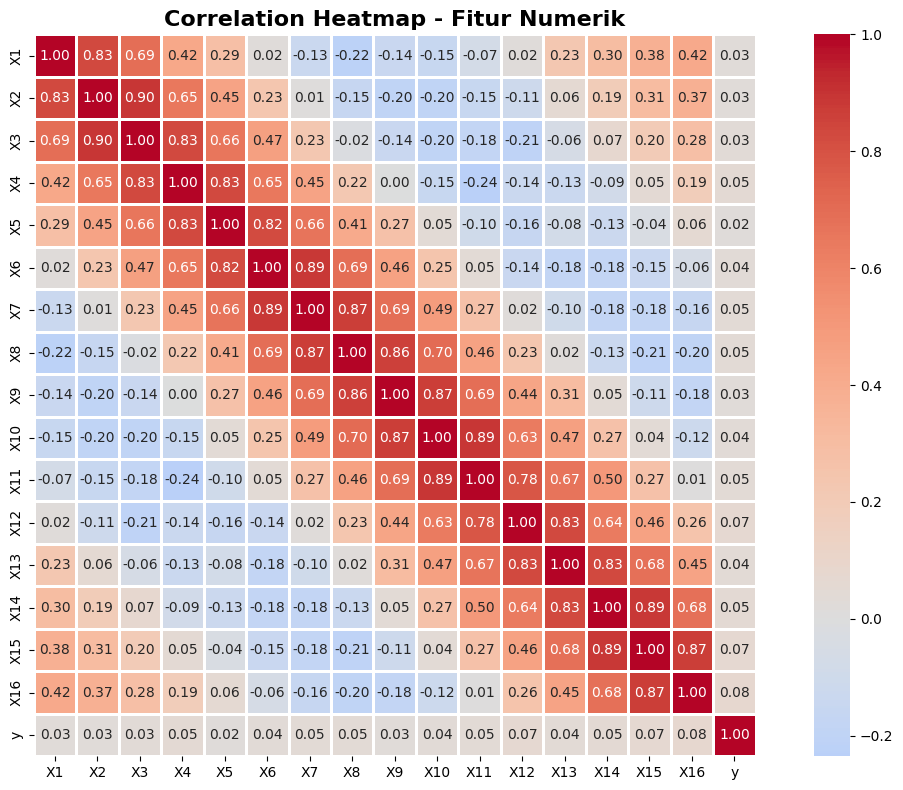


 Korelasi dengan Target ('y'):
y      1.000000
X16    0.077532
X15    0.070639
X12    0.069392
X4     0.051215
X14    0.049624
X11    0.046676
X8     0.046662
X7     0.046110
X13    0.042550
X10    0.039164
X6     0.036070
X3     0.032078
X9     0.028986
X1     0.026202
X2     0.025481
X5     0.018526
Name: y, dtype: float64


In [ ]:
#@title Visualisasi 3: Correlation Heatmap
print("\n Visualisasi 3: Correlation Heatmap (Fitur Numerik)")
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 8))
    correlation = df[numerical_cols].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
                fmt='.2f', linewidths=1, square=True)
    plt.title('Correlation Heatmap - Fitur Numerik', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Tampilkan korelasi tertinggi dengan target
    if target_col in numerical_cols:
        print(f"\n Korelasi dengan Target ('{target_col}'):")
        target_corr = correlation[target_col].sort_values(ascending=False)
        print(target_corr)

# 4. DATA PREPARATION

In [ ]:
# Buat copy dataset untuk preprocessing
df_processed = df.copy()

#@title 4.1 Data Cleaning
print("\n4.1 DATA CLEANING")
print("-" * 50)

# Handle missing values
if df_processed.isnull().sum().sum() > 0:
    print(" Menghandle missing values...")

    # Untuk fitur numerik: isi dengan median
    num_imputer = SimpleImputer(strategy='median')
    if len(numerical_cols) > 0:
        df_processed[numerical_cols] = num_imputer.fit_transform(df_processed[numerical_cols])

    # Untuk fitur kategorikal: isi dengan modus
    cat_imputer = SimpleImputer(strategy='most_frequent')
    if len(categorical_cols) > 0:
        df_processed[categorical_cols] = cat_imputer.fit_transform(df_processed[categorical_cols])

    print(f"✓ Missing values berhasil dihandle")
else:
    print("✓ Tidak ada missing values")

# Remove duplicates
if duplicates > 0:
    df_processed = df_processed.drop_duplicates()
    print(f"✓ {duplicates} baris duplikat dihapus")
else:
    print("✓ Tidak ada data duplikat")

print(f"\nShape setelah cleaning: {df_processed.shape}")


4.1 DATA CLEANING
--------------------------------------------------
 Menghandle missing values...
✓ Missing values berhasil dihandle
✓ 24 baris duplikat dihapus

Shape setelah cleaning: (7976, 17)


In [ ]:
#@title 4.2 Feature Engineering
# Encoding Fitur Kategorikal
print("=" * 80)
print("ENCODING FITUR KATEGORIKAL")
print("=" * 80)

df_encoded = df_processed.copy()
label_encoders = {}

# Identifikasi fitur kategorikal
categorical_features = df_encoded.select_dtypes(include=['object']).columns.tolist()

if categorical_features:
    print(f"Encoding {len(categorical_features)} fitur kategorikal...")

    for col in categorical_features:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"✓ {col}: {len(le.classes_)} kategori unik → encoded [0-{len(le.classes_)-1}]")

    print(f"\n✓ Total {len(categorical_features)} fitur telah di-encode")
else:
    print("✓ Tidak ada fitur kategorikal yang perlu di-encode")

print(f"\nUkuran dataset setelah encoding: {df_encoded.shape}")

# Feature Selection (Opsional)
# Untuk project ini, kita akan menggunakan semua fitur
# Namun bisa ditambahkan feature selection jika diperlukan

print("\n" + "=" * 80)
print("FEATURE SELECTION")
print("=" * 80)
print("Menggunakan semua fitur untuk modeling")
print(f"Total fitur: {df_encoded.shape[1] - 1} (excluding target)")

ENCODING FITUR KATEGORIKAL
✓ Tidak ada fitur kategorikal yang perlu di-encode

Ukuran dataset setelah encoding: (7976, 17)

FEATURE SELECTION
Menggunakan semua fitur untuk modeling
Total fitur: 16 (excluding target)


In [ ]:
#@title 4.3 Data Transformation

# Feature Scaling
print("\n" + "=" * 80)
print("FEATURE SCALING")
print("=" * 80)

# Pisahkan fitur dan target
X = df_processed.drop(columns=[target_col])
y = df_processed[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Scaling fitur numerik
print("\n Scaling fitur menggunakan StandardScaler...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("✓ Scaling selesai")

X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nNama fitur: {list(X.columns)}")

# Gunakan StandardScaler untuk normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame untuk kemudahan
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("✓ Feature scaling menggunakan StandardScaler")
print(f"\nContoh hasil scaling (5 baris pertama):")
print(X_scaled.head())
print(f"\nStatistik setelah scaling:")
print(f"Mean: {X_scaled.mean().mean():.6f} (mendekati 0)")
print(f"Std: {X_scaled.std().mean():.6f} (mendekati 1)")


FEATURE SCALING
Features shape: (7976, 16)
Target shape: (7976,)

 Scaling fitur menggunakan StandardScaler...
✓ Scaling selesai
Features (X): (7976, 16)
Target (y): (7976,)

Nama fitur: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16']
✓ Feature scaling menggunakan StandardScaler

Contoh hasil scaling (5 baris pertama):
         X1        X2        X3        X4        X5        X6        X7  \
0  0.176305  0.208645  0.577871  0.802278  0.790192  0.806361  0.629586   
1  0.589584  3.429669  3.677140  3.217388  2.162622  1.607196  0.865322   
2 -6.605445  0.028027  0.000556  0.027057 -0.010392  0.035187  0.010780   
3  0.494978  3.128638  2.249046  1.070623 -0.353500 -0.765648 -1.079496   
4 -0.177222 -2.711348 -2.916403 -2.745847 -2.469330 -2.100374 -1.226831   

         X8        X9       X10       X11       X12       X13       X14  \
0  0.332661 -0.295178 -0.505252 -0.536974 -0.382553  0.363458  0.961726   
1  0.186096 -0.547670

In [ ]:
#@title 4.4 Data Splitting
print("\n4.4 DATA SPLITTING")
print("-" * 50)

# Tentukan apakah task klasifikasi atau regresi
is_classification = len(np.unique(y)) < 20  # Heuristik sederhana

if is_classification:
    # Stratified split untuk klasifikasi
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    print("✓ Stratified train-test split (klasifikasi)")
else:
    # Regular split untuk regresi
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    print("✓ Train-test split (regresi)")

# Split ratio: 80:20
test_size = 0.2
RANDOM_STATE = 42 # Define RANDOM_STATE

# Gunakan stratify untuk klasifikasi agar distribusi kelas seimbang
if TASK_TYPE == 'classification':
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=RANDOM_STATE, stratify=y
    )
    print("✓ Stratified split digunakan untuk menjaga distribusi kelas")
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=RANDOM_STATE
    )
    print("✓ Random split digunakan untuk regresi")

print(f"\nUkuran Train Set: {X_train.shape[0]} samples ({(1-test_size)*100:.0f}%)")
print(f"Ukuran Test Set: {X_test.shape[0]} samples ({test_size*100:.0f}%)")
print(f"\nDistribusi Target di Train Set:")
if TASK_TYPE == 'classification':
    print(y_train.value_counts().sort_index())
else:
    print(f"Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")


4.4 DATA SPLITTING
--------------------------------------------------
✓ Stratified train-test split (klasifikasi)
✓ Stratified split digunakan untuk menjaga distribusi kelas

Ukuran Train Set: 6380 samples (80%)
Ukuran Test Set: 1596 samples (20%)

Distribusi Target di Train Set:
y
0.0    1409
1.0    1599
2.0    1784
3.0    1588
Name: count, dtype: int64


# 5. MODELING

In [ ]:
#@title 5.1 Baseline Model
print("=" * 80)
print("MODEL 1: BASELINE MODEL")
print("=" * 80)

if is_classification:
    print("\n Model: Logistic Regression")
    baseline_model = LogisticRegression(random_state=42, max_iter=1000)
else:
    print("\n Model: Decision Tree Regressor")
    from sklearn.tree import DecisionTreeRegressor
    baseline_model = DecisionTreeRegressor(random_state=42)

# Training
print("\n Training model...")
baseline_model.fit(X_train, y_train)
print("✓ Training selesai")

# Prediction
y_pred_baseline = baseline_model.predict(X_test)
print("✓ Prediksi selesai")

print(f"\n Sample Predictions (5 pertama):")
print(f"Actual:    {y_test.values[:5]}")
print(f"Predicted: {y_pred_baseline[:5]}")

if TASK_TYPE == 'classification':
    # Logistic Regression untuk klasifikasi
    model_1 = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
    model_1_name = "Logistic Regression"
else:
    # Linear Regression untuk regresi
    model_1 = LinearRegression()
    model_1_name = "Linear Regression"

print(f"Model: {model_1_name}")
print("Training model...")

# Training
model_1.fit(X_train, y_train)

# Prediksi
y_pred_1_train = model_1.predict(X_train)
y_pred_1_test = model_1.predict(X_test)

print("✓ Model 1 telah dilatih dan siap untuk evaluasi")

MODEL 1: BASELINE MODEL

 Model: Logistic Regression

 Training model...
✓ Training selesai
✓ Prediksi selesai

 Sample Predictions (5 pertama):
Actual:    [1. 1. 1. 0. 3.]
Predicted: [2. 3. 1. 0. 1.]
Model: Logistic Regression
Training model...
✓ Model 1 telah dilatih dan siap untuk evaluasi



MODEL 2: ADVANCED ML MODEL

 Model: Random Forest Classifier

 Training model...
✓ Training selesai
✓ Prediksi selesai

 Top 10 Feature Importance:
   Feature  Importance
7       X8    0.131872
15     X16    0.123376
10     X11    0.099460
5       X6    0.078656
6       X7    0.072464
11     X12    0.069982
14     X15    0.062964
0       X1    0.061381
2       X3    0.059836
9      X10    0.048075


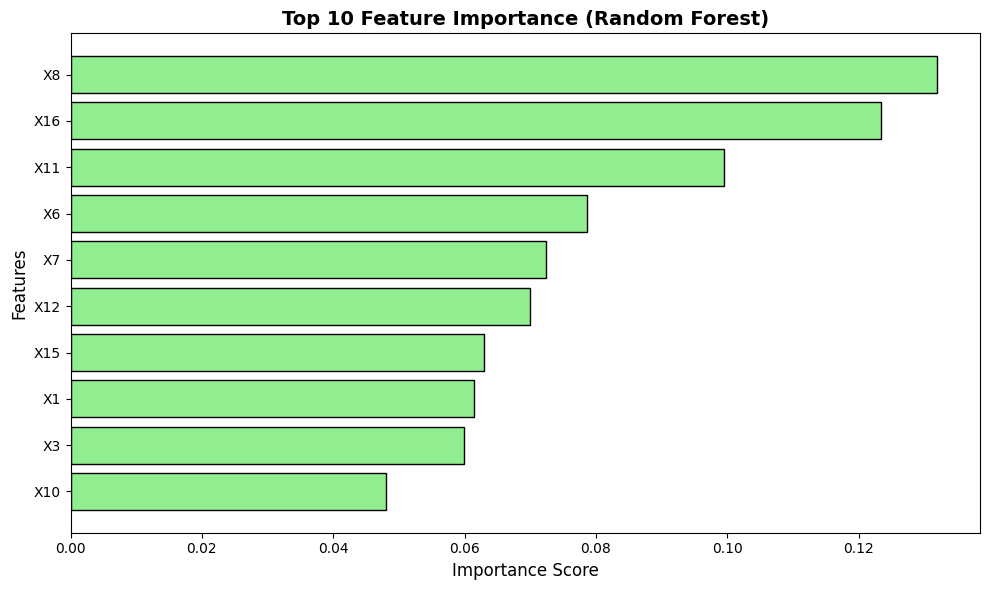

In [ ]:
#@title 5.2 ADVANCED MACHINE LEARNING MODEL
print("\n" + "=" * 50)
print("MODEL 2: ADVANCED ML MODEL")
print("=" * 50)

if is_classification:
    print("\n Model: Random Forest Classifier")
    advanced_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=10,
        min_samples_split=5
    )
else:
    print("\n Model: Random Forest Regressor")
    from sklearn.ensemble import RandomForestRegressor
    advanced_model = RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        max_depth=10,
        min_samples_split=5
    )

# Training
print("\n Training model...")
advanced_model.fit(X_train, y_train)
print("✓ Training selesai")

# Prediction
y_pred_advanced = advanced_model.predict(X_test)
print("✓ Prediksi selesai")

# Feature importance
print("\n Top 10 Feature Importance:")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': advanced_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['Feature'], top_features['Importance'], color='lightgreen', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


MODEL 3: DEEP LEARNING (Neural Network)

 Model: Sequential Neural Network (TensorFlow/Keras)

 Arsitektur Model:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,644 (49.39 KB)

 Trainable params: 12,644 (49.39 KB)

 Non-trainable params: 0 (0.00 B)


 Training Deep Learning model...
Epoch: 50 | Batch Size: 32 | Validation Split: 20%
Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4522 - loss: 1.1617 - val_accuracy: 0.7304 - val_loss: 0.6584
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7360 - loss: 0.6393 - val_accuracy: 0.8127 - val_loss: 0.4645
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7772 - loss: 0.5096 - val_accuracy: 0.8339 - val_loss: 0.3802
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8225 - loss: 0.4337 - val_accuracy: 0.8582 - val_loss: 0.3331
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.3849 - val_accuracy: 0.8676 - val_loss: 0.3132
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8612 - loss: 0.3346 - val_accuracy: 0.8668 - val_loss: 0.3038
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.3181 - val_accuracy: 0.8738 - val_loss: 0.2869
Epoch 8/50
160/160 

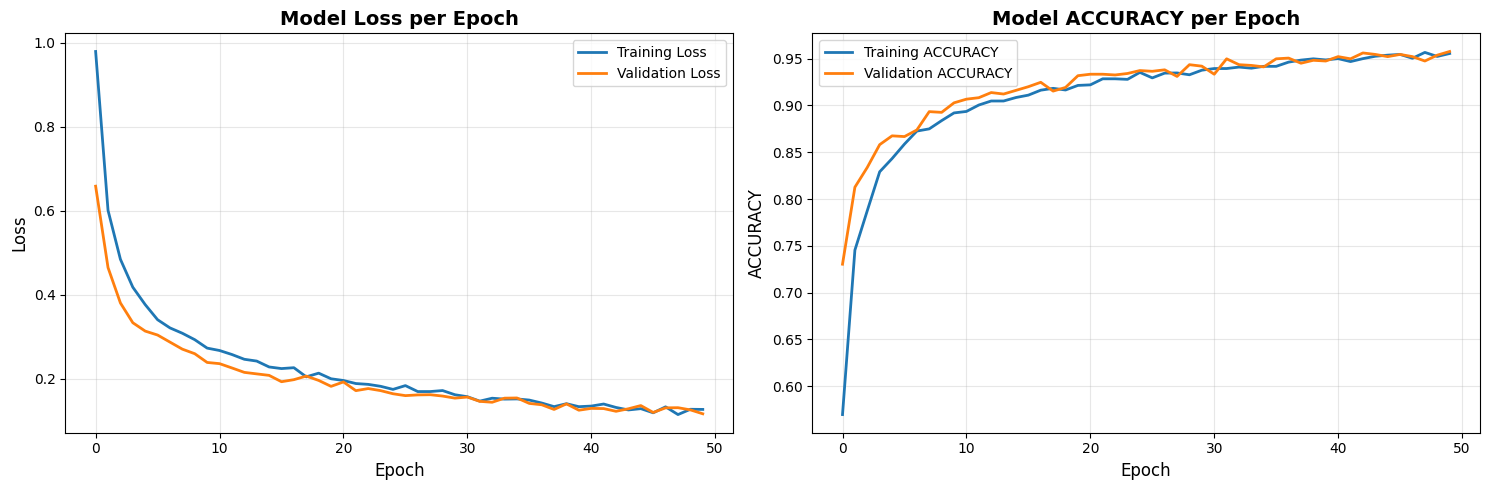


Best Epoch: 50
Final Training Loss: 0.1266
Final Validation Loss: 0.1161

Melakukan prediksi dengan Neural Network...
✓ Prediksi selesai


In [ ]:
#@title 5.3 DEEP LEARNING MODEL (NEURAL NETWORK)
print("\n" + "=" * 50)
print("MODEL 3: DEEP LEARNING (Neural Network)")
print("=" * 50)

print("\n Model: Sequential Neural Network (TensorFlow/Keras)")

# Build model
input_dim = X_train.shape[1]

if is_classification:
    n_classes = len(np.unique(y))

    if n_classes == 2:
        # Binary classification
        output_activation = 'sigmoid'
        loss = 'binary_crossentropy'
        output_units = 1
    else:
        # Multi-class classification
        output_activation = 'softmax'
        loss = 'sparse_categorical_crossentropy'
        output_units = n_classes

    metrics = ['accuracy']
else:
    # Regression
    output_activation = 'linear'
    loss = 'mse'
    output_units = 1
    metrics = ['mae']

# Arsitektur Neural Network
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,), name='Hidden_Layer_1'),
    Dropout(0.3, name='Dropout_1'),
    Dense(64, activation='relu', name='Hidden_Layer_2'),
    Dropout(0.2, name='Dropout_2'),
    Dense(32, activation='relu', name='Hidden_Layer_3'),
    Dense(output_units, activation=output_activation, name='Output_Layer')
])

# Compile model
dl_model.compile(
    optimizer='adam',
    loss=loss,
    metrics=metrics
)

print("\n Arsitektur Model:")
dl_model.summary()

# Callback untuk early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Training
print("\n Training Deep Learning model...")
print("Epoch: 50 | Batch Size: 32 | Validation Split: 20%")

history = dl_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

print("\n✓ Training selesai")

# Prediction
if is_classification and n_classes > 2:
    y_pred_dl_proba = dl_model.predict(X_test)
    y_pred_dl = np.argmax(y_pred_dl_proba, axis=1)
else:
    y_pred_dl = dl_model.predict(X_test).flatten()
    if is_classification:
        y_pred_dl = (y_pred_dl > 0.5).astype(int)

print("✓ Prediksi selesai")

# Plot Training History
print("\n Visualisasi Training History")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Model Loss per Epoch', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Metric plot
metric_name = 'accuracy' if is_classification else 'mae'
axes[1].plot(history.history[metric_name], label=f'Training {metric_name.upper()}', linewidth=2)
axes[1].plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name.upper()}', linewidth=2)
axes[1].set_title(f'Model {metric_name.upper()} per Epoch', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel(metric_name.upper(), fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nBest Epoch: {len(history.history['loss']) - early_stop.patience if early_stop.stopped_epoch > 0 else len(history.history['loss'])}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

# Prediksi dengan Neural Network
print("\nMelakukan prediksi dengan Neural Network...")

y_pred_3_train_raw = dl_model.predict(X_train, verbose=0)
y_pred_3_test_raw = dl_model.predict(X_test, verbose=0)

# Convert predictions based on task type
if TASK_TYPE == 'classification':
    if output_units == 1:
        # Binary classification
        y_pred_3_train = (y_pred_3_train_raw > 0.5).astype(int).flatten()
        y_pred_3_test = (y_pred_3_test_raw > 0.5).astype(int).flatten()
    else:
        # Multi-class classification
        y_pred_3_train = np.argmax(y_pred_3_train_raw, axis=1)
        y_pred_3_test = np.argmax(y_pred_3_test_raw, axis=1)
else:
    # Regression
    y_pred_3_train = y_pred_3_train_raw.flatten()
    y_pred_3_test = y_pred_3_test_raw.flatten()

print("\u2713 Prediksi selesai")

model_3_name = "Neural Network (MLP)"

# 6. EVALUATION


8. EVALUASI MODEL

 TASK: CLASSIFICATION

 EVALUASI: Baseline Model (Logistic Regression)

✓ Accuracy:  0.4731 (47.31%)
✓ Precision: 0.5139 (51.39%)
✓ Recall:    0.4731 (47.31%)
✓ F1-Score:  0.4762 (47.62%)

 Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.39      0.53       353
         1.0       0.51      0.61      0.56       400
         2.0       0.43      0.49      0.46       446
         3.0       0.34      0.39      0.37       397

    accuracy                           0.47      1596
   macro avg       0.52      0.47      0.48      1596
weighted avg       0.51      0.47      0.48      1596



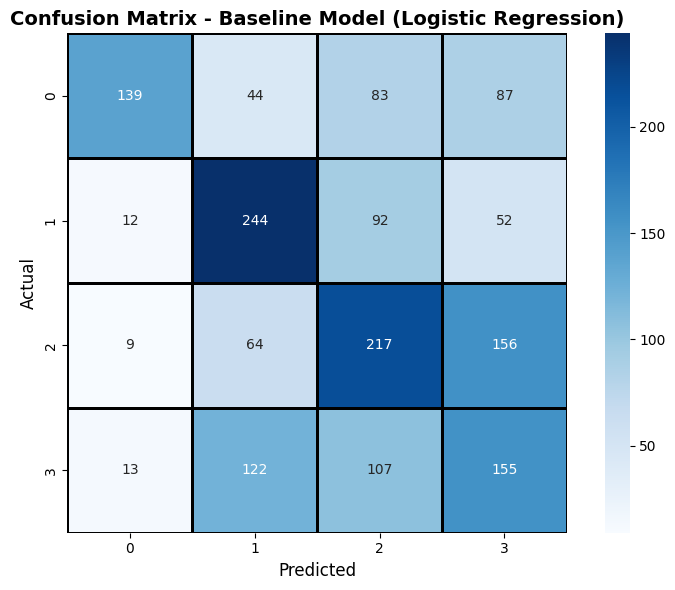


 EVALUASI: Advanced Model (Random Forest)

✓ Accuracy:  0.8371 (83.71%)
✓ Precision: 0.8477 (84.77%)
✓ Recall:    0.8371 (83.71%)
✓ F1-Score:  0.8340 (83.40%)

 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       353
         1.0       0.89      0.86      0.88       400
         2.0       0.71      0.91      0.80       446
         3.0       0.82      0.59      0.69       397

    accuracy                           0.84      1596
   macro avg       0.86      0.84      0.84      1596
weighted avg       0.85      0.84      0.83      1596



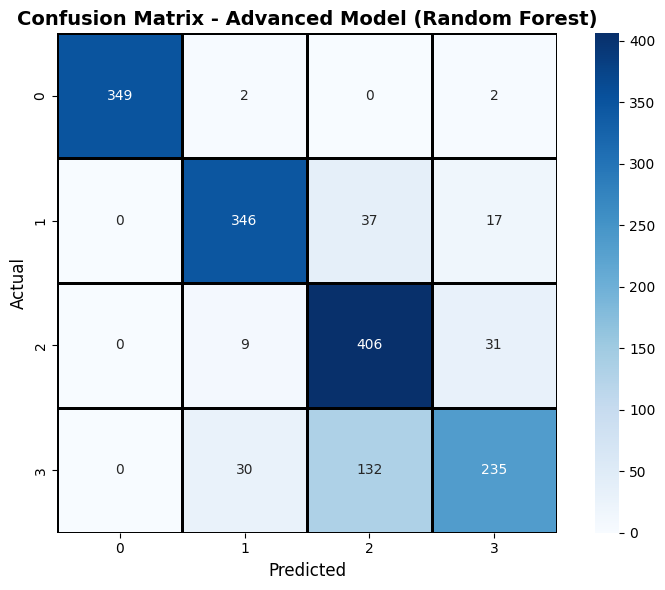


 EVALUASI: Deep Learning Model (Neural Network)

✓ Accuracy:  0.9637 (96.37%)
✓ Precision: 0.9638 (96.38%)
✓ Recall:    0.9637 (96.37%)
✓ F1-Score:  0.9637 (96.37%)

 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       353
         1.0       0.98      0.96      0.97       400
         2.0       0.95      0.95      0.95       446
         3.0       0.93      0.94      0.94       397

    accuracy                           0.96      1596
   macro avg       0.97      0.96      0.97      1596
weighted avg       0.96      0.96      0.96      1596



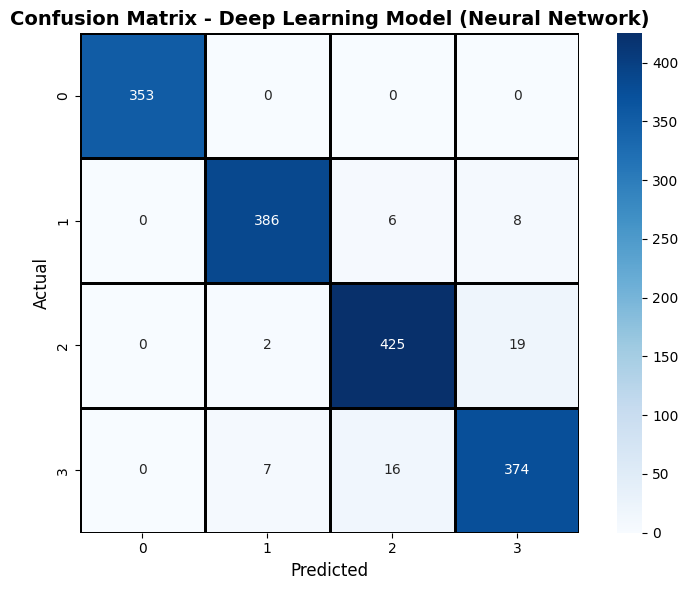

In [ ]:
print("\n" + "=" * 50)
print("8. EVALUASI MODEL")
print("=" * 50)

def evaluate_classification(y_true, y_pred, model_name):
    """Evaluasi model klasifikasi"""
    print(f"\n{'='*50}")
    print(f" EVALUASI: {model_name}")
    print(f"{'='*50}")

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print(f"\n✓ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"✓ Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"✓ Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"✓ F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

    print(f"\n Classification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                square=True, linewidths=1, linecolor='black')
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.tight_layout()
    plt.show()

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

def evaluate_regression(y_true, y_pred, model_name):
    """Evaluasi model regresi"""
    print(f"\n{'='*50}")
    print(f" EVALUASI: {model_name}")
    print(f"{'='*50}")

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n✓ MSE:  {mse:.4f}")
    print(f"✓ RMSE: {rmse:.4f}")
    print(f"✓ MAE:  {mae:.4f}")
    print(f"✓ R² Score: {r2:.4f} ({r2*100:.2f}%)")

    # Scatter plot: Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, edgecolors='k')
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             'r--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Actual vs Predicted - {model_name}', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    }

# Evaluasi semua model
results = {}

if is_classification:
    print("\n TASK: CLASSIFICATION")
    results['Baseline (Logistic Regression)'] = evaluate_classification(
        y_test, y_pred_baseline, 'Baseline Model (Logistic Regression)'
    )
    results['Random Forest'] = evaluate_classification(
        y_test, y_pred_advanced, 'Advanced Model (Random Forest)'
    )
    results['Deep Learning (Neural Network)'] = evaluate_classification(
        y_test, y_pred_dl, 'Deep Learning Model (Neural Network)'
    )
else:
    print("\n TASK: REGRESSION")
    results['Baseline (Decision Tree)'] = evaluate_regression(
        y_test, y_pred_baseline, 'Baseline Model (Decision Tree)'
    )
    results['Random Forest'] = evaluate_regression(
        y_test, y_pred_advanced, 'Advanced Model (Random Forest)'
    )
    results['Deep Learning (Neural Network)'] = evaluate_regression(
        y_test, y_pred_dl, 'Deep Learning Model (Neural Network)'
    )

# 7. MODEL COMPARISON & ANALYSIS


9. PERBANDINGAN MODEL

 TABEL PERBANDINGAN PERFORMA MODEL:
                                Accuracy  Precision    Recall  F1-Score
Baseline (Logistic Regression)  0.473058   0.513927  0.473058  0.476214
Random Forest                   0.837093   0.847674  0.837093  0.833960
Deep Learning (Neural Network)  0.963659   0.963787  0.963659  0.963707

Visualisasi Perbandingan Performa Model


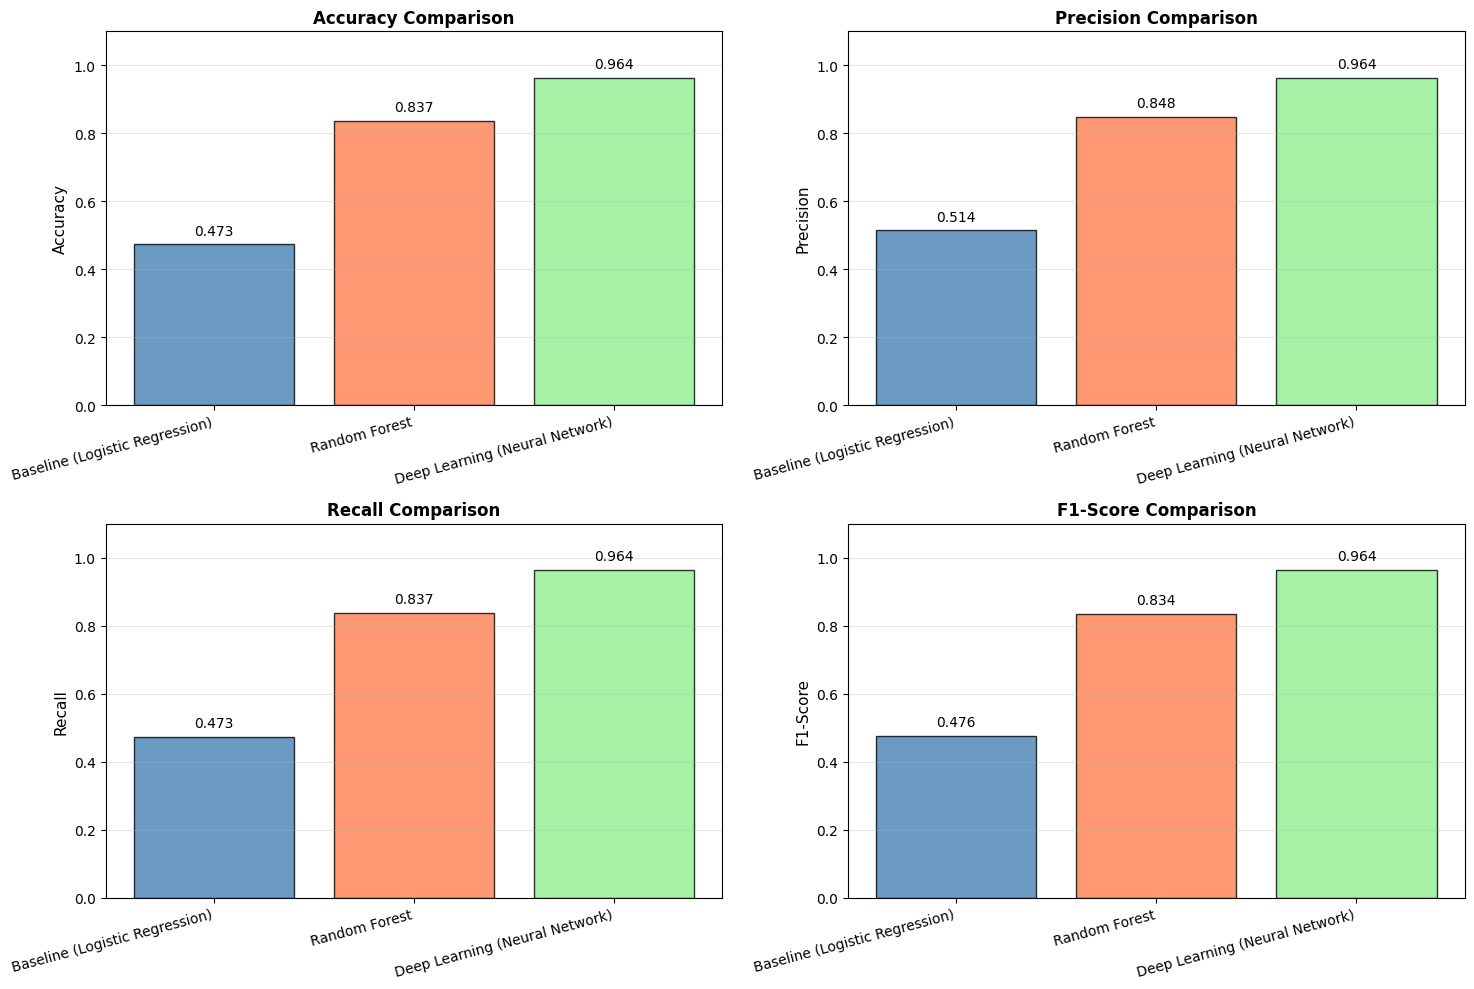


 ANALISIS MODEL TERBAIK:
--------------------------------------------------
✓ Model terbaik berdasarkan Accuracy: Deep Learning (Neural Network)
✓ Skor Accuracy: 0.9637

 INSIGHT:
• Deep Learning model menunjukkan performa terbaik
• Neural Network mampu menangkap pola kompleks dalam data


In [ ]:
print("\n" + "=" * 50)
print("9. PERBANDINGAN MODEL")
print("=" * 50)

# Buat tabel perbandingan
comparison_df = pd.DataFrame(results).T
print("\n TABEL PERBANDINGAN PERFORMA MODEL:")
print("=" * 80)
print(comparison_df.to_string())
print("=" * 80)

# Visualisasi Perbandingan Model
print("\nVisualisasi Perbandingan Performa Model")

if TASK_TYPE == 'classification':
    # Plot untuk Classification
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score'] # Corrected to use uppercase
    metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for idx, (metric, label) in enumerate(zip(metrics, metric_labels)):
        values = comparison_df[metric].values
        models = comparison_df.index.values # Corrected to use index for model names

        bars = axes[idx].bar(range(len(models)), values, color=['steelblue', 'coral', 'lightgreen'],
                            edgecolor='black', alpha=0.8)
        axes[idx].set_xticks(range(len(models)))
        axes[idx].set_xticklabels(models, rotation=15, ha='right')
        axes[idx].set_ylabel(label, fontsize=11)
        axes[idx].set_title(f'{label} Comparison', fontsize=12, fontweight='bold')
        axes[idx].set_ylim([0, 1.1])
        axes[idx].grid(axis='y', alpha=0.3)

        # Add value labels on bars
        for bar, val in zip(bars, values):
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                          f'{val:.3f}', ha='center', va='bottom', fontsize=10)
else:
    # Plot untuk Regression
    metrics = ['MSE', 'RMSE', 'MAE', 'R² Score'] # Corrected to use uppercase
    metric_labels = ['MSE', 'RMSE', 'MAE', 'R² Score']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for idx, (metric, label) in enumerate(zip(metrics, metric_labels)):
        values = comparison_df[metric].values
        models = comparison_df.index.values # Corrected to use index for model names

        bars = axes[idx].bar(range(len(models)), values, color=['steelblue', 'coral', 'lightgreen'],
                            edgecolor='black', alpha=0.8)
        axes[idx].set_xticks(range(len(models)))
        axes[idx].set_xticklabels(models, rotation=15, ha='right')
        axes[idx].set_ylabel(label, fontsize=11)
        axes[idx].set_title(f'{label} Comparison', fontsize=12, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

        # Add value labels on bars
        for bar, val in zip(bars, values):
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                          f'{val:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Analisis model terbaik
print("\n ANALISIS MODEL TERBAIK:")
print("-" * 50)

if TASK_TYPE == 'classification':
    best_metric = 'Accuracy'
else:
    best_metric = 'R² Score' if 'R² Score' in comparison_df.columns else 'RMSE'

if best_metric in comparison_df.columns:
    if best_metric == 'RMSE':
        best_model = comparison_df[best_metric].idxmin()
    else:
        best_model = comparison_df[best_metric].idxmax()

    print(f"✓ Model terbaik berdasarkan {best_metric}: {best_model}")
    print(f"✓ Skor {best_metric}: {comparison_df.loc[best_model, best_metric]:.4f}")

    print("\n INSIGHT:")
    if 'Deep Learning' in best_model:
        print("• Deep Learning model menunjukkan performa terbaik")
        print("• Neural Network mampu menangkap pola kompleks dalam data")
    elif 'Random Forest' in best_model:
        print("• Random Forest memberikan performa terbaik")
        print("• Ensemble method efektif untuk dataset ini")
    else:
        print("• Baseline model sudah memberikan performa yang baik")
        print("• Model sederhana mungkin sudah cukup untuk kasus ini")

# 8. SAVE MODEL

In [ ]:
print("\n" + "=" * 50)
print("10. SAVE MODEL TERBAIK")
print("=" * 50)

import joblib
from google.colab import files

target_encoder = None # Initialize target_encoder to None

# Tentukan model mana yang akan disimpan
if 'Deep Learning' in best_model:
    print(f"\n Menyimpan model: Deep Learning (Neural Network)")
    # Save Keras model
    dl_model.save('best_model_dl.h5')
    print("✓ Model Deep Learning disimpan: best_model_dl.h5")

    # Save preprocessing objects
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(label_encoders, 'label_encoders.pkl')
    if target_encoder:
        joblib.dump(target_encoder, 'target_encoder.pkl')

    print("✓ Scaler dan encoders disimpan")

    # Download
    print("\n Mendownload model...")
    files.download('best_model_dl.h5')
    files.download('scaler.pkl')
    files.download('label_encoders.pkl')
    if target_encoder:
        files.download('target_encoder.pkl')

elif 'Random Forest' in best_model:
    print(f"\n Menyimpan model: Random Forest")
    # Save sklearn model
    joblib.dump(advanced_model, 'best_model_rf.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(label_encoders, 'label_encoders.pkl')
    if target_encoder:
        joblib.dump(target_encoder, 'target_encoder.pkl')

    print("✓ Model Random Forest disimpan: best_model_rf.pkl")
    print("✓ Scaler dan encoders disimpan")

    # Download
    print("\n Mendownload model...")
    files.download('best_model_rf.pkl')
    files.download('scaler.pkl')
    files.download('label_encoders.pkl')
    if target_encoder:
        files.download('target_encoder.pkl')

else:
    print(f"\n Menyimpan model: Baseline")
    # Save baseline model
    joblib.dump(baseline_model, 'best_model_baseline.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(label_encoders, 'label_encoders.pkl')
    if target_encoder:
        joblib.dump(target_encoder, 'target_encoder.pkl')

    print("✓ Model Baseline disimpan: best_model_baseline.pkl")
    print("✓ Scaler dan encoders disimpan")

    # Download
    print("\n Mendownload model...")
    files.download('best_model_baseline.pkl')
    files.download('scaler.pkl')
    files.download('label_encoders.pkl')
    if target_encoder:
        files.download('target_encoder.pkl')

print("\n" + "=" * 50)
print("✅")


10. SAVE MODEL TERBAIK

 Menyimpan model: Deep Learning (Neural Network)
✓ Model Deep Learning disimpan: best_model_dl.h5
✓ Scaler dan encoders disimpan

 Mendownload model...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅


In [2]:
import numpy
import pandas
import sklearn
import tensorflow
import torch # Opsional, jika ingin mengecek torch juga

print(f"numpy=={numpy.__version__}")
print(f"pandas=={pandas.__version__}")
print(f"scikit-learn=={sklearn.__version__}")
print(f"tensorflow=={tensorflow.__version__}")
try:
    print(f"torch=={torch.__version__}")
except NameError:
    print("# torch tidak terinstall/diimport")
print("-" * 30)

numpy==2.0.2
pandas==2.2.2
scikit-learn==1.6.1
tensorflow==2.19.0
torch==2.9.0+cpu
------------------------------
